# Project 4 - Online Purchase Intent

by 23AIML056_Kavya

## Preprocessing

In [56]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

In [57]:
# Importing the dataset
df = pd.read_csv("D:\\Datasets\\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [58]:
df.shape

(12330, 18)

In [59]:
# Basic Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [60]:
# Creating a copy of the DataFrame for transformations, enconding, and scaling
df_copy = df.copy(deep=True)

In [61]:
# Encoding categorical variables
le = LabelEncoder()

df_copy['Month'] = le.fit_transform(df['Month'])
df_copy['VisitorType'] = le.fit_transform(df['VisitorType'])
df_copy['Revenue'] = df['Revenue'].astype(int)
df_copy['Weekend'] = df['Weekend'].astype(int)

In [62]:
# Basic Information after encoding
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Machine Learning

In [63]:
# Splitting data into features and target variable
X = df_copy.drop(['Revenue'], axis=1)
y = df_copy['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Classification on Non Transformed Data

In [64]:
# Training multiple models and comparing their performance
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = {"accuracy": accuracy, "auc": auc}
    
print("\nModel Comparison Results:")
comparison_df_scaled = pd.DataFrame(results).T
print(comparison_df_scaled)


Model Comparison Results:
                     accuracy       auc
Logistic Regression  0.869019  0.877888
Random Forest        0.892944  0.922547
Decision Tree        0.861719  0.752555
K-Nearest Neighbors  0.865369  0.793721


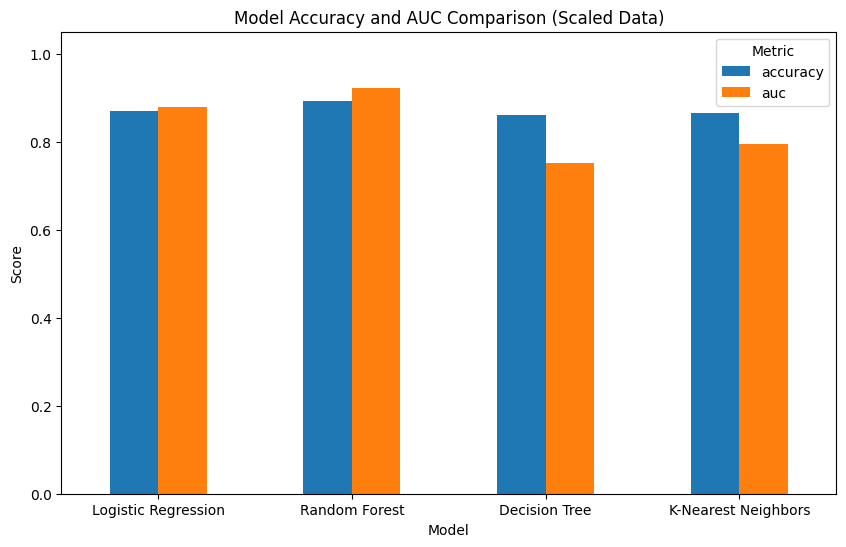

In [65]:
# Plotting the results for simple scaled data
comparison_df_scaled.plot(kind="bar", figsize=(10, 6), ylim=(0, 1.05))
plt.title("Model Accuracy and AUC Comparison (Scaled Data)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.xticks(rotation=0)
plt.show()

#### Conclusion:

- The Random Forest is giving the best results on simple scaled data

### PCA Transformed Data

In [66]:
# PCA for dimensionality reduction
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(9864, 3)

In [67]:
# Training multiple models and comparing their performance on PCA-transformed data
models_pca = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

results_pca = {}

for name, model in models_pca.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_pca)[:, 1])
    results_pca[name] = {"accuracy": accuracy, "auc": auc}

print("\nModel Comparison Results (PCA Transformed Data):")
comparison_df_pca = pd.DataFrame(results_pca).T
print(comparison_df_pca)


Model Comparison Results (PCA Transformed Data):
                     accuracy       auc
Logistic Regression  0.842255  0.774979
Random Forest        0.843877  0.754912
Decision Tree        0.764801  0.571776
K-Nearest Neighbors  0.832522  0.697217


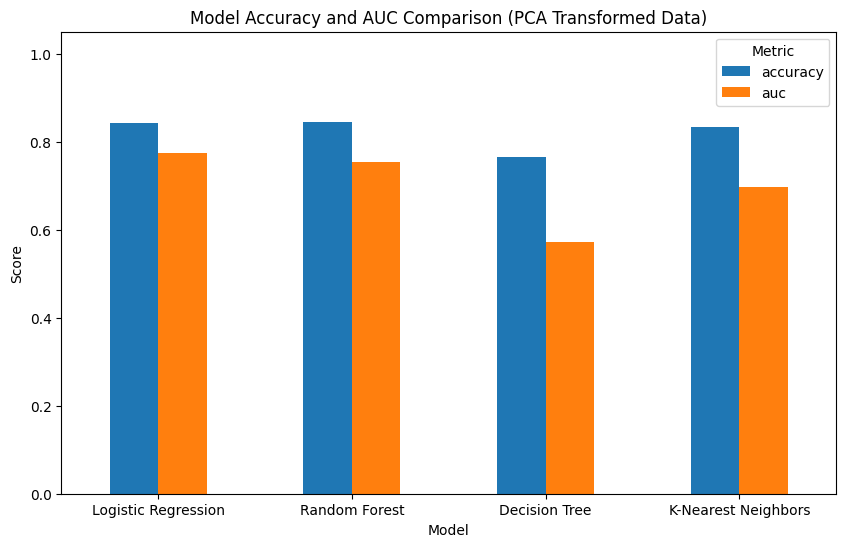

In [68]:
# Plotting the results for PCA-transformed data
comparison_df_pca.plot(kind="bar", figsize=(10, 6), ylim=(0, 1.05))
plt.title("Model Accuracy and AUC Comparison (PCA Transformed Data)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.xticks(rotation=0)
plt.show()

#### Conclusion:

- Even on the PCA Transformed Data, the random forest gives the best result
- However the PCA Transformed Data is giving worse result than scaled only data

### Sampled data

In [69]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.value_counts().to_dict())
print("SMOTE training set shape:", pd.Series(y_train_smote).value_counts().to_dict())

Original training set shape: {0: 8367, 1: 1497}
SMOTE training set shape: {0: 8367, 1: 8367}


In [70]:
# Training multiple models and comparing their performance on SMOTE-sampled data
models_smote = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

results_smote = {}

for name, model in models_smote.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results_smote[name] = {"accuracy": accuracy, "auc": auc}

print("\nModel Comparison Results (SMOTE Sampled Data):")
comparison_df_smote = pd.DataFrame(results_smote).T
print(comparison_df_smote)


Model Comparison Results (SMOTE Sampled Data):
                     accuracy       auc
Logistic Regression  0.873074  0.885376
Random Forest        0.890105  0.922148
Decision Tree        0.846715  0.740633
K-Nearest Neighbors  0.777778  0.801241


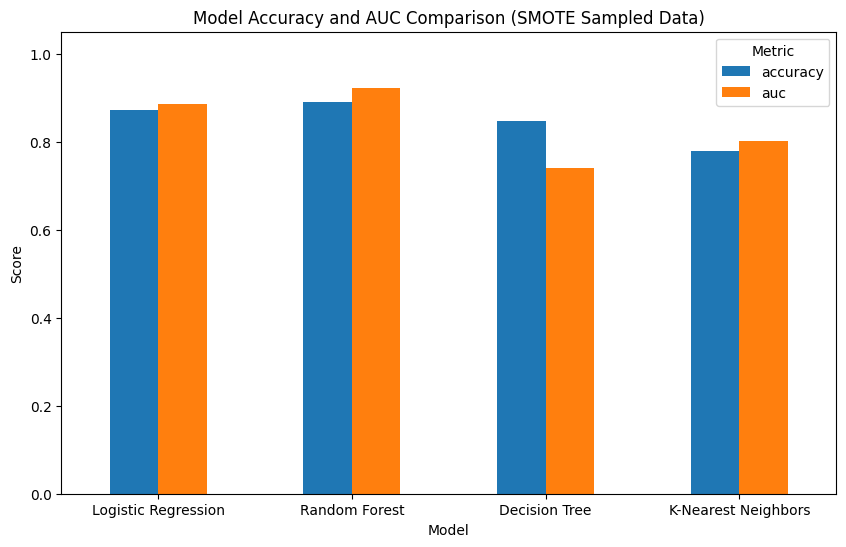

In [71]:
# Plotting the results for SMOTE-sampled data
comparison_df_smote.plot(kind="bar", figsize=(10, 6), ylim=(0, 1.05))
plt.title("Model Accuracy and AUC Comparison (SMOTE Sampled Data)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.xticks(rotation=0)
plt.show()

#### Conclusion:

- Applying SMOTE to balance the classes improved the performance of some models, especially for minority class prediction.
- Random Forest continues to provide the best results on the SMOTE-sampled data.
- Overall, SMOTE helps address class imbalance, but the improvement depends on the model and

### SMOTE + Scaled

In [72]:
# Scale features, then apply SMOTE to training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_scaled_smote, y_train_scaled_smote = smote.fit_resample(X_train_scaled, y_train)

print("Original training set shape:", y_train.value_counts().to_dict())
print(
    "SMOTE + scaled training set shape:",
    pd.Series(y_train_scaled_smote).value_counts().to_dict(),
)

Original training set shape: {0: 8367, 1: 1497}
SMOTE + scaled training set shape: {0: 8367, 1: 8367}


In [73]:
# Training multiple models and comparing their performance on scaled + SMOTE data
models_scaled_smote = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

results_scaled_smote = {}

for name, model in models_scaled_smote.items():
    model.fit(X_train_scaled_smote, y_train_scaled_smote)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    results_scaled_smote[name] = {"accuracy": accuracy, "auc": auc}

print("\nModel Comparison Results (Scaled + SMOTE Data):")
comparison_df_scaled_smote = pd.DataFrame(results_scaled_smote).T
print(comparison_df_scaled_smote)


Model Comparison Results (Scaled + SMOTE Data):
                     accuracy       auc
Logistic Regression  0.873074  0.885376
Random Forest        0.890105  0.922297
Decision Tree        0.845093  0.745499
K-Nearest Neighbors  0.777778  0.801241


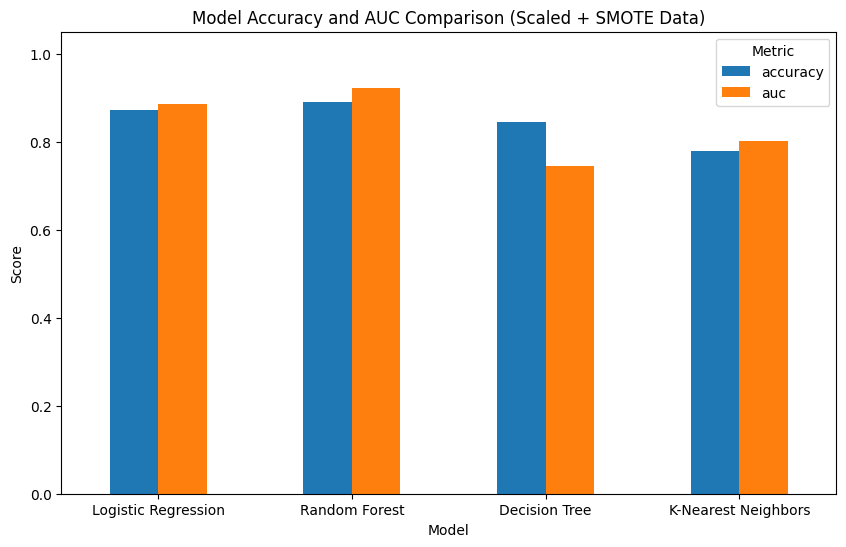

In [74]:
# Plotting the results for scaled + SMOTE data
comparison_df_scaled_smote.plot(kind="bar", figsize=(10, 6), ylim=(0, 1.05))
plt.title("Model Accuracy and AUC Comparison (Scaled + SMOTE Data)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.xticks(rotation=0)
plt.show()

#### Conclusion:

- Combining scaling with SMOTE provided the most balanced and robust performance across all models.
- This approach further improved minority class prediction without sacrificing overall accuracy.
- Random Forest remained the top-performing model, demonstrating strong results on the scaled and

### Conclusion:

- Among all four approaches (scaled data, PCA-transformed data, SMOTE-sampled data, and SMOTE + Scaled data), the Random Forest classifier consistently provided the best results in terms of both accuracy and AUC.
- Scaling the data improved model performance compared to using raw features, while PCA-based dimensionality reduction led to a decrease in performance, likely due to information loss from reducing the number of features.
- Applying SMOTE to balance the classes helped improve the performance of some models, especially for the minority class, but the best results were achieved when combining both scaling and SMOTE.
- The combination of scaling and SMOTE (SMOTE + Scaled) provided the most balanced and robust performance across all models, further improving minority class prediction without sacrificing overall accuracy.
- In summary, proper preprocessing—especially scaling and handling class imbalance with SMOTE—significantly enhances model performance, and ensemble methods like Random Forest are robust choices for this